Saving support_cases.csv to support_cases.csv
First 5 rows of the dataset:
   message_length  response_time  case_type
0             106             29  technical
1             220             18    general
2             356             44    general
3             341              8    general
4             294             31    billing

Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   message_length  100 non-null    int64 
 1   response_time   100 non-null    int64 
 2   case_type       100 non-null    object
dtypes: int64(2), object(1)
memory usage: 2.5+ KB
None

Statistical summary:
       message_length  response_time
count      100.000000     100.000000
mean       254.730000      21.120000
std        134.586374      13.387224
min         29.000000       1.000000
25%        145.250000       9.000000
50%        252.00

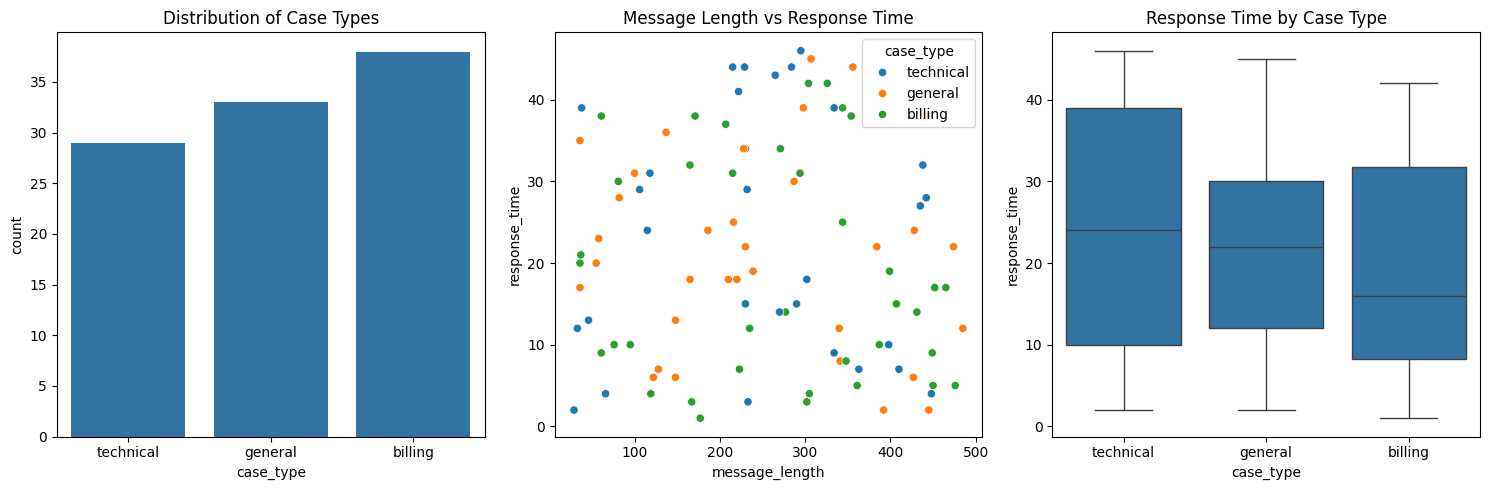


Classification Report:
              precision    recall  f1-score   support

     billing       0.60      0.40      0.48        15
     general       0.00      0.00      0.00         8
   technical       0.31      0.57      0.40         7

    accuracy                           0.33        30
   macro avg       0.30      0.32      0.29        30
weighted avg       0.37      0.33      0.33        30


Confusion Matrix:
[[6 5 4]
 [3 0 5]
 [1 2 4]]

Accuracy Score: 0.3333333333333333

Feature Importance:
          Feature  Importance
0  message_length    0.536361
1   response_time    0.463639


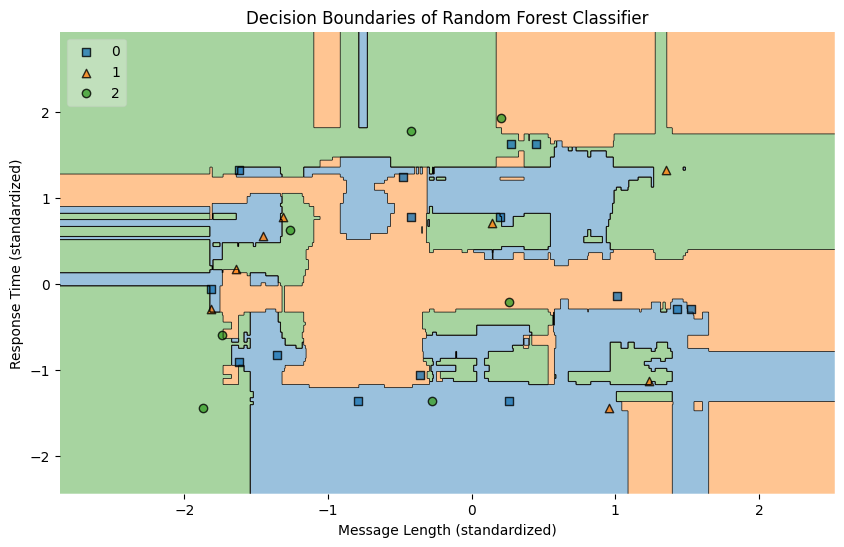

In [1]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Step 2: Load and explore the data
from google.colab import files
uploaded = files.upload()

# Read the CSV file
df = pd.read_csv('support_cases.csv')

# Display first few rows
print("First 5 rows of the dataset:")
print(df.head())

# Basic information about the dataset
print("\nDataset information:")
print(df.info())

# Statistical summary
print("\nStatistical summary:")
print(df.describe())

# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())

# Step 3: Data Visualization
plt.figure(figsize=(15, 5))

# Distribution of case types
plt.subplot(1, 3, 1)
sns.countplot(x='case_type', data=df)
plt.title('Distribution of Case Types')

# Message length vs response time by case type
plt.subplot(1, 3, 2)
sns.scatterplot(x='message_length', y='response_time', hue='case_type', data=df)
plt.title('Message Length vs Response Time')

# Boxplot of response time by case type
plt.subplot(1, 3, 3)
sns.boxplot(x='case_type', y='response_time', data=df)
plt.title('Response Time by Case Type')

plt.tight_layout()
plt.show()

# Step 4: Prepare data for modeling
# Convert categorical target variable to numerical
df['case_type'] = df['case_type'].map({'billing': 0, 'general': 1, 'technical': 2})

# Split into features and target
X = df[['message_length', 'response_time']]
y = df['case_type']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 5: Build and train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 6: Evaluate the model
# Predictions
y_pred = model.predict(X_test)

# Evaluation metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['billing', 'general', 'technical']))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

# Step 7: Feature Importance
feature_importance = pd.DataFrame({
    'Feature': ['message_length', 'response_time'],
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance)

# Step 8: Visualize decision boundaries (optional)
# This helps understand how the model is making decisions
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize=(10, 6))
plot_decision_regions(X_test, y_test.values, clf=model, legend=2)
plt.xlabel('Message Length (standardized)')
plt.ylabel('Response Time (standardized)')
plt.title('Decision Boundaries of Random Forest Classifier')
plt.show()